<h1>Google Play Store Visualization(Seaborn)</h1

In [1]:
import pandas as pd

In [2]:
ds=pd.read_csv("googleplaystore.csv") #import dataset

In [3]:
ds.head() #print first 5 head

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#import all the library
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<h1>Data Cleaning</h1>

<h3>Drop all missing data</h3>

In [5]:
#find all miss data
totalmissing=ds.isnull().sum()
totalmissing

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
ds1=ds.dropna(how='any') #drop all miss data
ds1.isnull().sum() #check if any null value still present

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

<h3>Done</h3>

<h3>Size</h3>

In [7]:
pd.unique(ds1.Size) #Show unique size value

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [8]:
len(ds1[ds1.Size=='Varies with device']) #total Varies with device value

1637

In [9]:
#first is convert to N.A
import numpy as np
ds1['Size'].replace('Varies with device',np.nan,inplace=True)

C:\Users\ajaym\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
a=ds1.Size.replace(r'[kM]+$','',regex=True).astype(float)  
#remove k&M from end of each values and convert it to float dtype for the caculations
b=ds1.Size.str.extract(r'[\d\.]+([kM]+)',expand=False).fillna(1).replace(['k','M'],[10**3,10**6]).astype(int)
#convert k to 1000 and M to 1000000
#change dtype to float and remove k&M for calculation upon its..

In [11]:
ds1.Size=a*b #get size in bytes

C:\Users\ajaym\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [12]:
ds1['Size'].fillna(ds1.groupby('Category')['Size'].transform('mean'),inplace = True) #fill all na value with this category means

C:\Users\ajaym\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


<h3>Done</h3>

<h3>Installs</h3>

In [13]:
ds.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [14]:
ds1.Installs=ds1.Installs.replace(r'[,+]','',regex=True).astype(int)

C:\Users\ajaym\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [15]:
ds1.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

In [16]:
sorted_value=sorted(list(ds1['Installs'].unique()))

In [17]:
sorted_value

[1,
 5,
 10,
 50,
 100,
 500,
 1000,
 5000,
 10000,
 50000,
 100000,
 500000,
 1000000,
 5000000,
 10000000,
 50000000,
 100000000,
 500000000,
 1000000000]

In [19]:
ds1['Installforplot']=ds1['Installs'].replace(sorted_value,range(0,len(sorted_value),1))

C:\Users\ajaym\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
ds1.Installforplot.head()

0     8
1    11
2    13
3    15
4    10
Name: Installforplot, dtype: int64

<h3>Done</h3>

<h3>Price</h3>

In [22]:
ds1.Price.value_counts().head(30)

0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
$3.99        58
$1.49        30
$2.49        21
$5.99        18
$9.99        16
$6.99        13
$399.99      11
$14.99       10
$4.49         9
$7.99         7
$3.49         7
$29.99        6
$19.99        5
$12.99        5
$24.99        5
$11.99        5
$8.99         4
$16.99        3
$5.49         3
$10.00        3
$33.99        2
$1.70         2
$79.99        2
$3.95         2
$17.99        2
Name: Price, dtype: int64

In [23]:
ds1.Price=ds1.Price.replace(r'[,$]','',regex=True).astype(float)

C:\Users\ajaym\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [24]:
ds1.Price.describe()

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [25]:
ds1[ds1.Price==400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installforplot
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,8


<h3>Done</h3>

<h3>Last Updated</h3>

In [26]:
ds1['Last Updated']=pd.to_datetime(ds1['Last Updated'])

C:\Users\ajaym\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<h3>Done</h3>

In [27]:
ds1.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                   object
Size                     float64
Installs                   int32
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
Installforplot             int64
dtype: object

<h3>Count of app in each category<h3/>

In [28]:
total=ds1.Category.value_counts()
percent=(ds1.Category.value_counts()/ds1.Category.notnull().sum())*100
category_data=pd.concat([total,percent],axis=1,keys=['total','percent'])
category_data

,total,percent
FAMILY,1746,18.653846
GAME,1097,11.720085
TOOLS,733,7.831197
PRODUCTIVITY,351,3.750000
MEDICAL,350,3.739316
COMMUNICATION,328,3.504274
FINANCE,323,3.450855
SPORTS,319,3.408120
PHOTOGRAPHY,317,3.386752
LIFESTYLE,314,3.354701


Text(0.5,0,'Category')

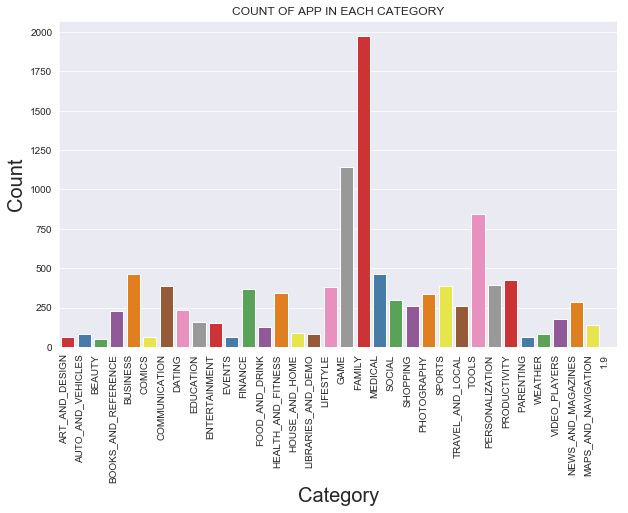

In [29]:
plt.figure(figsize=(10,6))
sns.set_style(style="darkgrid")
cateplot=sns.countplot(x='Category',data=ds,palette='Set1')
cateplot.set_xticklabels(cateplot.get_xticklabels(),rotation=90,ha='right')
cateplot
plt.title("COUNT OF APP IN EACH CATEGORY")
plt.ylabel("Count",size=20)
plt.xlabel("Category",size=20)


<h3>Higher Count Category<h3\>
<table>
  <tr>
    <th>FAMILY</th>
    <th>1746</th> 
    <th>18.65%</th>
  </tr>
  <tr>
    <td>GAME</td>
    <td>1097</td> 
    <td>11.72%</td>
  </tr>
  <tr>
    <td>TOOLS</td>
    <td>733</td> 
    <td>7.83%</td>
  </tr>
</table>

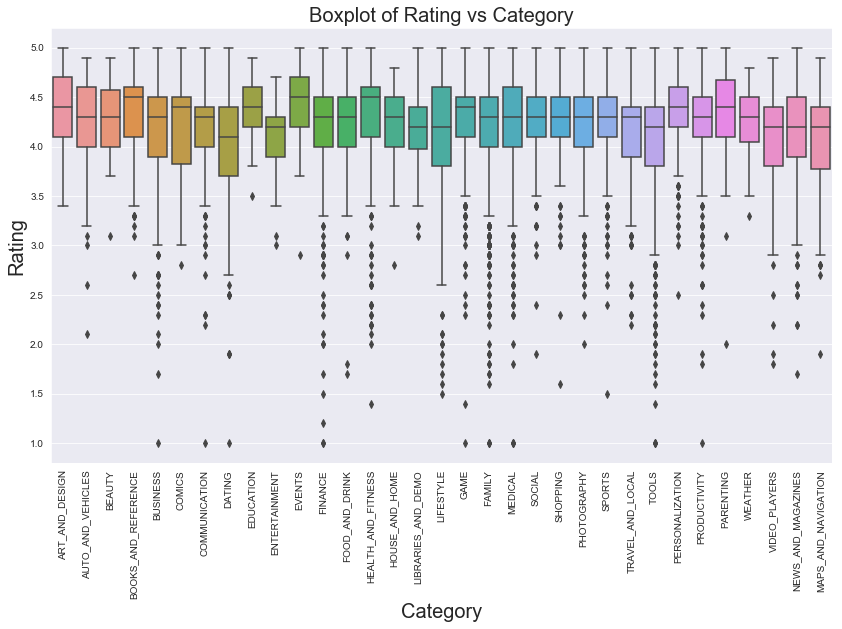

In [109]:
plt.figure(figsize=(14,8))
bxrating=sns.boxplot(y='Rating',x='Category',data=ds1)
bxrating.set_xticklabels(bxrating.get_xticklabels(),rotation=90)
plt.title("Boxplot of Rating vs Category",size=20)
plt.xlabel("Category",size=20)
plt.ylabel("Rating",size=20)
bxrating


<h3>Price</h3>

In [34]:
ds2=ds1[['Type','Installs']].groupby('Type').mean()
ds2

,Installs
Type,
Free,1.922582e+07
Paid,1.130102e+05


Text(0.5,1,'Free or Paid VS Installs')

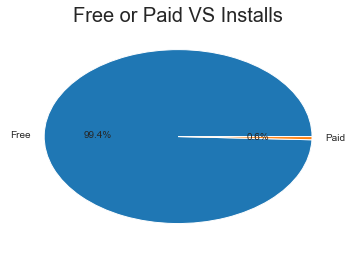

In [35]:
plt.pie(ds2.Installs,labels=ds2.index,autopct='%1.1f%%')
plt.title("Free or Paid VS Installs",size=20)

In [61]:
ds1.loc[ ds1['Price'] == 0, 'PriceBand'] = '0 Free'
ds1.loc[(ds1['Price'] > 0) & (ds1['Price'] <= 1.99), 'PriceBand'] = '1 cheap'
ds1.loc[(ds1['Price'] > 1.99) & (ds1['Price'] <= 5.99), 'PriceBand']   = '2 not cheap'
ds1.loc[(ds1['Price'] > 5.99) & (ds1['Price'] <= 15.99), 'PriceBand']   = '3 normal'
ds1.loc[(ds1['Price'] > 15.99) & (ds1['Price'] <= 24.99), 'PriceBand']   = '4 expensive'
ds1.loc[(ds1['Price'] > 24.99) & (ds1['Price'] <= 79.99), 'PriceBand']   = '5 too expensive'
ds1.loc[(ds1['Price'] > 79.99), 'PriceBand']  = '6 too much expensive'

C:\Users\ajaym\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ajaym\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [62]:
ds1[['PriceBand','Rating']].groupby(['PriceBand']).mean()

,Rating
PriceBand,
0 Free,4.186288
1 cheap,4.297101
2 not cheap,4.277116
3 normal,4.234667
4 expensive,4.347059
5 too expensive,4.058333
6 too much expensive,3.866667


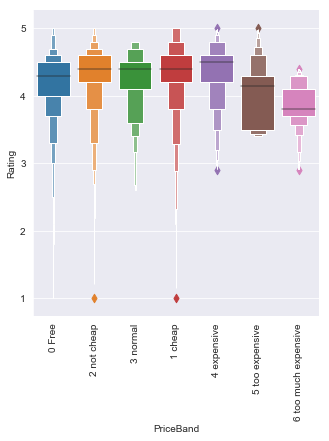

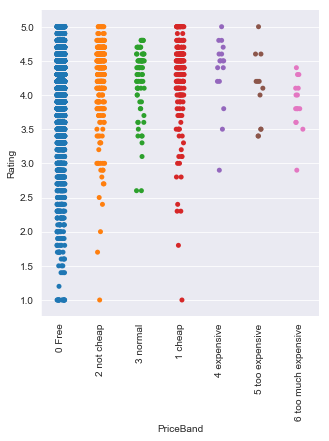

In [84]:

i=sns.catplot(y='Rating',x='PriceBand',kind='boxen',data=ds1)
j=sns.catplot(y='Rating',x='PriceBand',data=ds1)
i.set_xticklabels(rotation=90)
j.set_xticklabels(rotation=90)

Text(0.5,1,'Installs VS PriceBand')

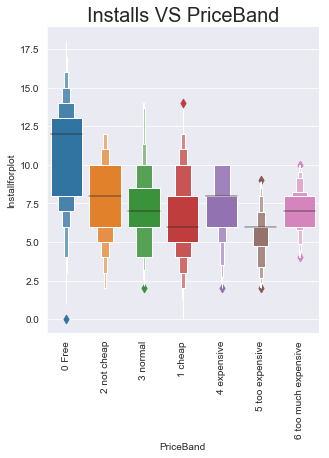

In [71]:
k=sns.catplot(y='Installforplot',x='PriceBand',data=ds1,kind='boxen')
k.set_xticklabels(rotation=90)
plt.title('Installs VS PriceBand',size=20)

C:\Users\ajaym\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Rating')

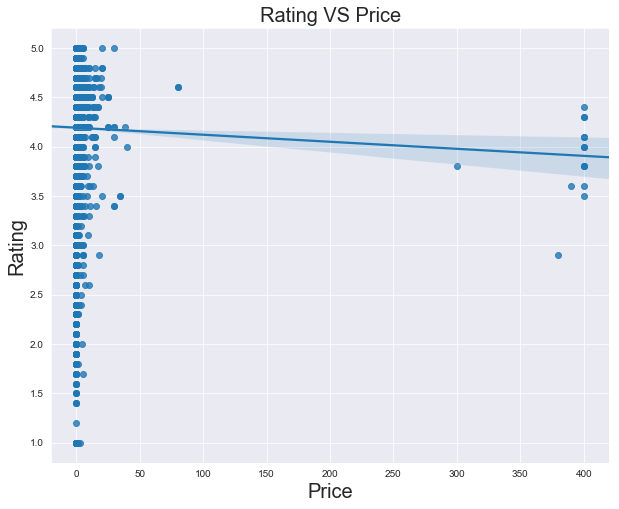

In [89]:
plt.figure(figsize=(10,8))
sns.regplot(x='Price',y='Rating',data=ds1)
plt.title('Rating VS Price',size=20)
plt.xlabel('Price',size=20)
plt.ylabel('Rating',size=20)

<h3>SIZE</h3>

C:\Users\ajaym\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ajaym\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


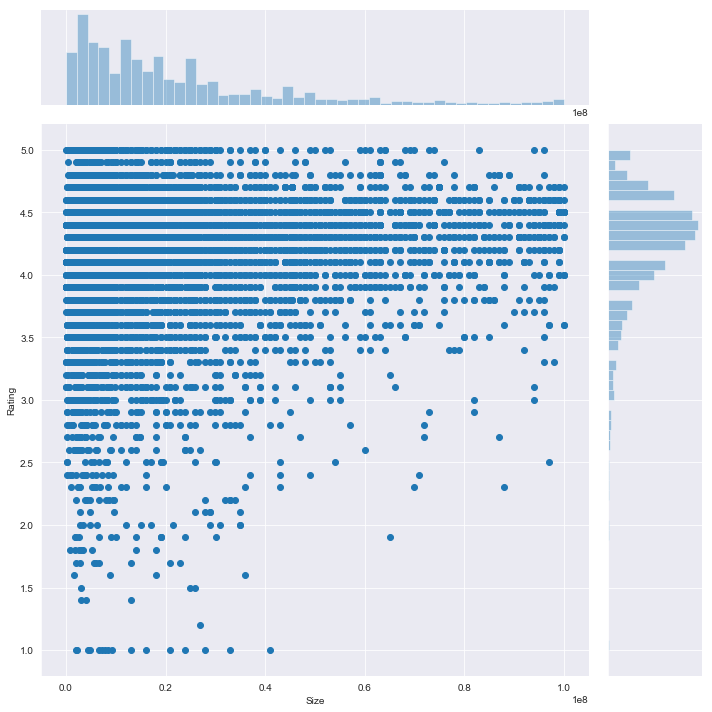

In [107]:
sns.jointplot(x='Size',y='Rating',data=ds1,size=10)

C:\Users\ajaym\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


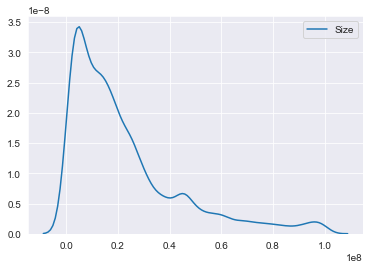

In [108]:
sns.kdeplot(ds1.Size)

<h3>Reviews</h3>

In [41]:
ds1['Reviews']=ds1['Reviews'].apply(lambda x:int(x))

C:\Users\ajaym\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\Users\ajaym\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Freq')

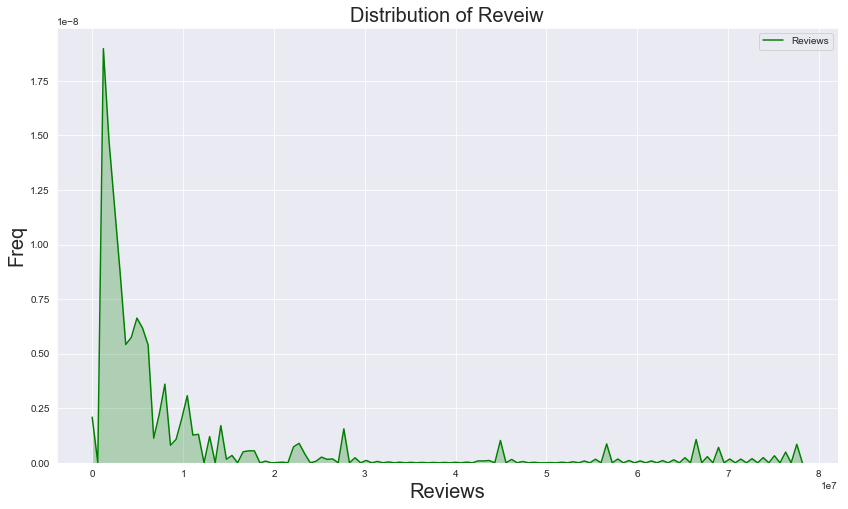

In [42]:
plt.figure(figsize=(14,8))
kdereviewplot=sns.kdeplot(ds1.Reviews,shade=True,color="Green")
plt.title('Distribution of Reveiw',size = 20)
plt.xlabel("Reviews",size=20)
plt.ylabel("Freq",size=20)

C:\Users\ajaym\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


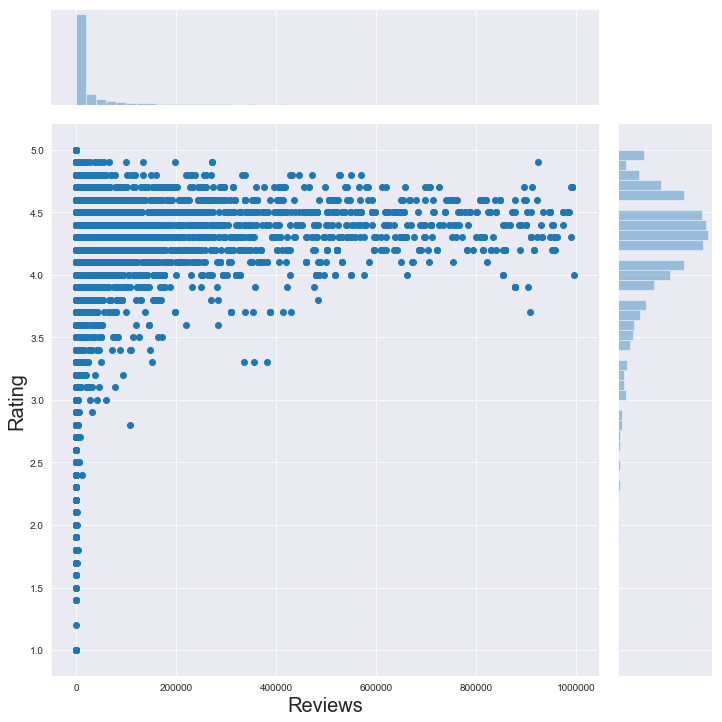

In [43]:
#plt.figture does'nt work on joinplot
ratingvsreviews=sns.jointplot(x='Reviews',y='Rating',data=ds1[ds1['Reviews']<1000000],height=10)
ratingvsreviews.set_axis_labels("Reviews","Rating",size='20')

<h3>Content Rating</h3>

In [ ]:
ds1['Content Rating'].unique()

In [ ]:
ds1[['Content Rating','Rating']].groupby('Content Rating').mean()

Text(0.5,1,'Rating VS Content Rating')

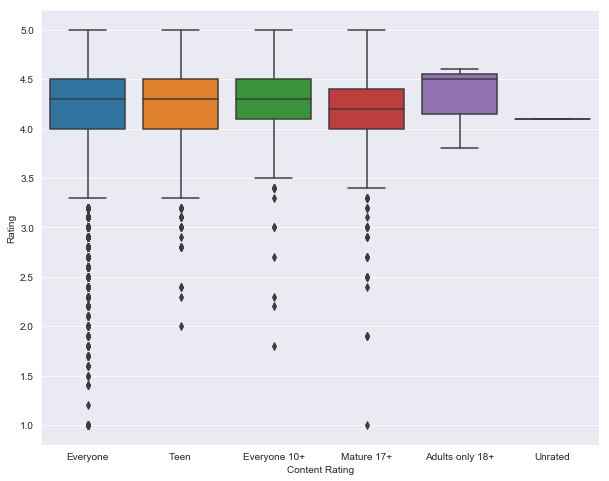

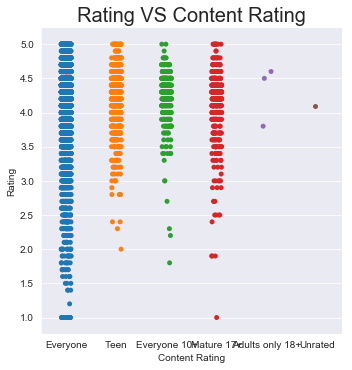

In [85]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Rating',x='Content Rating',data=ds1)
sns.catplot(y='Rating',x='Content Rating',data=ds1)
plt.title('Rating VS Content Rating',size=20)